In [109]:
import numpy as np
from numpy.random import default_rng

import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore') 

In [110]:
from sklearn.datasets import fetch_covtype
X, Y = fetch_covtype(return_X_y=True)

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target

In [118]:
print(len(X[0]))
print(len(Y))

54
581012


In [111]:
def GenerateTrainAndTestDataset(X, Y, test_ratio):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_ratio)

In [112]:
def SearchForBestClfUsingRandomCV(X, Y, Classifier_Search):
    params = {}
    searcher_CV = RandomizedSearchCV(Classifier_Search, scoring='average_precision', cv=10, n_iter=10, param_distributions=params,
                            refit=True, n_jobs=-1)
    searcher_CV.fit(X, Y)
    clf_best = searcher_CV.best_estimator_
    
    return clf_best

In [113]:
def TestAccurayOnDataset(X, Y, num_trials, test_size_ratio):
    
    dict_estimator = {}
    dict_estimator['LinearRegression'] = {'train': [], 'test': []}
    dict_estimator['SGD'] = {'train': [], 'test': []}
    dict_estimator['LogisticRegression'] = {'train': [], 'test': []}
    dict_estimator['LinearSVM'] = {'train': [], 'test': []}

    dict_estimator['GaussianNaiveBayes'] = {'train': [], 'test': []}
    dict_estimator['AdaBoost'] = {'train': [], 'test': []}
    dict_estimator['RandomForest'] = {'train': [], 'test': []}
    dict_estimator['GaussianProcess'] = {'train': [], 'test': []}

    dict_estimator['NeuralNetwork'] = {'train': [], 'test': []}

    
    for i_trial in range(0, num_trials):
        
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size_ratio)
#         print(i_trial)
        
        Classifier_LogReg = LogisticRegression(fit_intercept=True)
#         clf_LogReg = SearchForBestClfUsingRandomCV(X_train, Y_train, Classifier_LogReg)
        clf_LogReg = Classifier_LogReg.fit(X_train, Y_train)
        score_LogReg_Train = clf_LogReg.score(X_train, Y_train)
        score_LogReg_Test = clf_LogReg.score(X_test, Y_test)
        
        dict_estimator['LogisticRegression']['train'].append(score_LogReg_Train)
        dict_estimator['LogisticRegression']['test'].append(score_LogReg_Test)
        
#         print("LogReg Done")
        
        Classifier_RF = RandomForestClassifier()
#         clf_RF = SearchForBestClfUsingRandomCV(X_train, Y_train, Classifier_RF)
        clf_RF = Classifier_RF.fit(X_train, Y_train)
        score_RF_Train = clf_RF.score(X_train, Y_train)
        score_RF_Test = clf_RF.score(X_test, Y_test)
        
        dict_estimator['RandomForest']['train'].append(score_RF_Train)
        dict_estimator['RandomForest']['test'].append(score_RF_Test)
        
#         print("RF Done")
#         print(i_trial)
        
#         score_LinReg = GenerateFaultScore()
#         score_SGD = GenerateFaultScore()
#         score_LinSVM = GenerateFaultScore()
#         score_GNB = GenerateFaultScore()
#         score_Ada = GenerateFaultScore()
#         score_GP = GenerateFaultScore()
#         score_NN = GenerateFaultScore()
        
#         dict_estimator['LinearRegression'].append(score_LinReg)
#         dict_estimator['SGD'].append(score_SGD)
#         dict_estimator['LinearSVM'].append(score_LinSVM)
#         dict_estimator['GaussianNaiveBayes'].append(score_GNB)
#         dict_estimator['AdaBoost'].append(score_Ada)
#         dict_estimator['GaussianProcess'].append(score_GP)
#         dict_estimator['NeuralNetwork'].append(score_NN)
        
    return dict_estimator
    

In [114]:
def PlotResults(list_trials, dict_train, dict_test):
    
    for key in dict_train.keys():
        plt.plot(list_trials, dict_train[key], '--', label=key+"Train")
        plt.plot(list_trials, dict_test[key], label=key+"Test")
        
    plt.legend(bbox_to_anchor=(1.05, 1.0))

In [115]:
# dict_estimator_real = TestAccurayOnDataset(dataset, num_trials)
# dict_estimator_k = TestAccurayOnDataset(dataset, num_trials)
# dict_estimator_bin = TestAccurayOnDataset(dataset, num_trials)

list_trials = np.arange(100,1100,100)

list_trials = np.arange(1,10,1)
# print(list_trials)

test_size_ratio = 0.3333

list_keys = ['LogisticRegression', 'RandomForest']

dict_train_mean = {var: [] for var in list_keys}
dict_train_std = {var: [] for var in list_keys}

dict_test_mean = {var: [] for var in list_keys}
dict_test_std = {var: [] for var in list_keys}

for num_trials in tqdm(list_trials):
#     print(num_trials)
    dict_estimator = TestAccurayOnDataset(X, Y, num_trials, test_size_ratio)
    
    for key in dict_estimator.keys():
        
        if(key in dict_train_mean):
            dict_train_mean[key].append(np.mean(dict_estimator[key]['train']))
            dict_train_std[key].append(np.std(dict_estimator[key]['train']))

            dict_test_mean[key].append(np.mean(dict_estimator[key]['test']))
            dict_test_std[key].append(np.std(dict_estimator[key]['test']))


  0%|          | 0/9 [00:00<?, ?it/s]

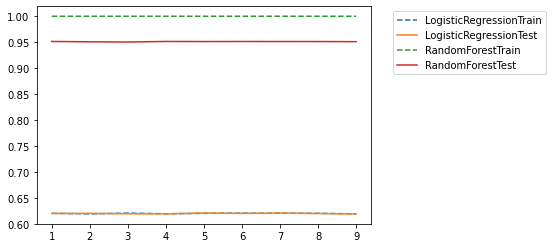

In [116]:
PlotResults(list_trials, dict_train_mean, dict_test_mean)

In [ ]:
# plt.legend(loc="upper left")
plt.show()

In [ ]:
def GenerateFaultScore():
    s = np.random.normal(0, 1)

In [ ]:
my_list = list(range(100))
for x in tqdm(my_list):
    pass